In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [18]:
path = '/Users/delphinedoutsas/Desktop/Master_ISI/M2_ISI/S9/Machine_learning/Projet/GitCode/Dual-Attention-Guided-Gaze-Target-Detection-in-the-Wild/MiDaS-master/tf/output/UPMC.png'

def extraction(chemin_fichier):
    # Extraction de l'image par OpenCV
    image = cv.imread(chemin_fichier)
    return image

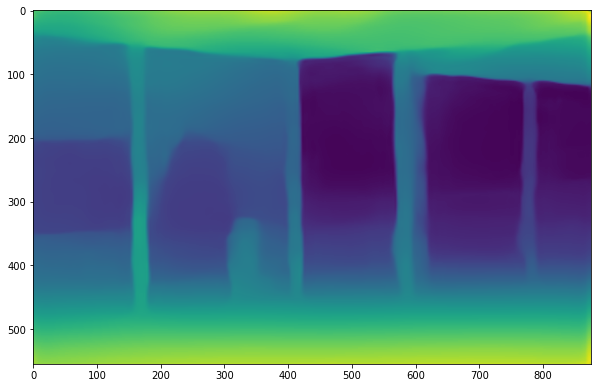

In [19]:
image = extraction(path)
image = image[:,:,0]

plt.figure(figsize=(10,10))

plt.imshow(image)

In [20]:
def normalize_pic(image):
    return image/256

In [21]:
def depth_difference_map(norm_depth_map, head_box_pic):
    
    Fd = np.zeros_like(norm_depth_map)
    
    nof_points = head_box_pic.shape[0]*head_box_pic.shape[1]
    
    sum_head_box = 0
    
    for l in range(head_box_pic.shape[0]):
        for m in range(head_box_pic.shape[1]):
            sum_head_box += head_box_pic[l,m] 
    
    substract = (1/nof_points)*sum_head_box
    
    for i in range(norm_depth_map.shape[0]):
        for j in range(norm_depth_map.shape[1]):
            
            Fd = norm_depth_map[i,j] - substract
    
    return Fd

In [22]:
def classification_background(Fd, tau=16):
    
    M_front = np.max(Fd, np.zeros_like(Fd))
    M_mid   = np.max((1-tau*(Fd)**2), np.zeros_like(Fd))
    M_back  = np.max(-Fd, np.zeros_like(Fd))
    
    return M_back, M_mid, M_front

In [23]:
def selection_attention_map(gz, M_back, M_mid, M_front, delta=0.3):
    
    Md = np.zeros_like(M_back)
    
    if gz >= -1 or gz <= -delta:
        Md = M_front
    elif gz >= -delta or gz <= delta:
        Md = M_mid
    elif gz >= delta or gz <= 1:
        Md = M_back
    else:
        return "Erreur d'assignation du fond"
    
    return Md

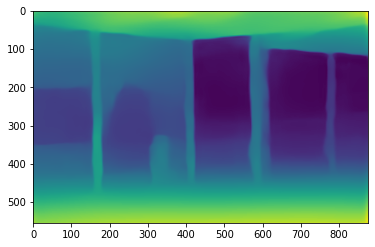

In [24]:
res_image = normalize_pic(image)
plt.imshow(res_image)
plt.show()

#Fd = depth_difference_map(norm_depth_map, head_box_pic)
#plt.imshow(Fd)
#plt.show()

#M_back, M_mid, M_front = classification_background(Fd, tau=16)
#plt.imshow(M_back)
#plt.show()
#plt.imshow(M_mid)
#plt.show()
#plt.imshow(M_front)
#plt.show()

#Md = selection_attention_map(gz, M_back, M_mid, M_front, delta=0.3)
#plt.imshow(Md)
#plt.show()